## 02_EDA

In [1]:
import os
import geopandas as gpd
import warnings
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from lib import personalised_graphics
from matplotlib.colors import LinearSegmentedColormap

# resolver futuras advertencias
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._core")
warnings.filterwarnings("ignore", category=FutureWarning, module="geopandas._core")

Cannot find header.dxf (GDAL_DATA is not defined)


In [2]:
# Importar y transformar sig data
sig_provincias = gpd.read_file("data/sig/provincia.shp", index_col=0)
sig_localidades = gpd.read_file("data/sig/localidad_bahra.shp", index_col=0)
sig_provincias["nam"] = sig_provincias["nam"].str.replace("Ciudad Autónoma de Buenos Aires", "Capital Federal")
sig_provincias["nam"] = sig_provincias["nam"].str.replace("Tierra del Fuego, Antártida e Islas del Atlántico Sur", "Tierra Del Fuego")
sig_provincias["nam"] = sig_provincias["nam"].str.replace("Santiago del Estero", "Santiago Del Estero")
sig_provincias.drop(columns=["gid", "entidad", "fna", "gna", "in1", "fdc", "sag"], inplace=True)
sig_provincias.rename(columns={"nam": "Provincia"}, inplace=True)
sig_localidades.rename(columns={"nom_agl": "Localidad"}, inplace=True) # Local
sig_localidades.drop(columns=["gid", "cod_pcia", "nom_pcia", "cod_depto", "cod_ase", "fna", "tipo_asent", "cod_aglo", "nom_aglo", "cod_agl", "fdc"], inplace=True)

# importar informacion nacional
velocidad_por_año = pd.read_csv("data/velocidad_nac_por_año.csv", index_col=0)
ingresos_nac = pd.read_csv("data/ingresos_nac.csv", index_col=0)
penetracion_nac = pd.read_csv("data/penetracion_nac.csv", index_col=0)
accesos_nac_por_tecnologia = pd.read_csv("data/accesos_nac_por_tecnologia.csv", index_col=0)
accesos_nac_por_velocidad = pd.read_csv("data/accesos_nac_por_velocidad.csv", index_col=0)

# importar informacion provincial
accesos_prov_por_tecnologia = pd.read_csv("data/accesos_prov_por_tecnologia.csv", index_col=0)
accesos_prov_por_velocidad = pd.read_csv("data/accesos_prov_por_velocidad.csv", index_col=0)
penetracion_prov = pd.read_csv("data/penetracion_prov.csv", index_col=0)

# importar informacion local
accesos_loc_por_tecnologia =  pd.read_csv("data/accesos_loc_por_tecnologia.csv", index_col=0)
accesos_loc_por_velocidad = pd.read_csv("data/accesos_loc_por_velocidad.csv", index_col=0)
localidades_con_conectividad = pd.read_csv("data/localidades_con_conectividad.csv", index_col=0)

#### Tendencias generales

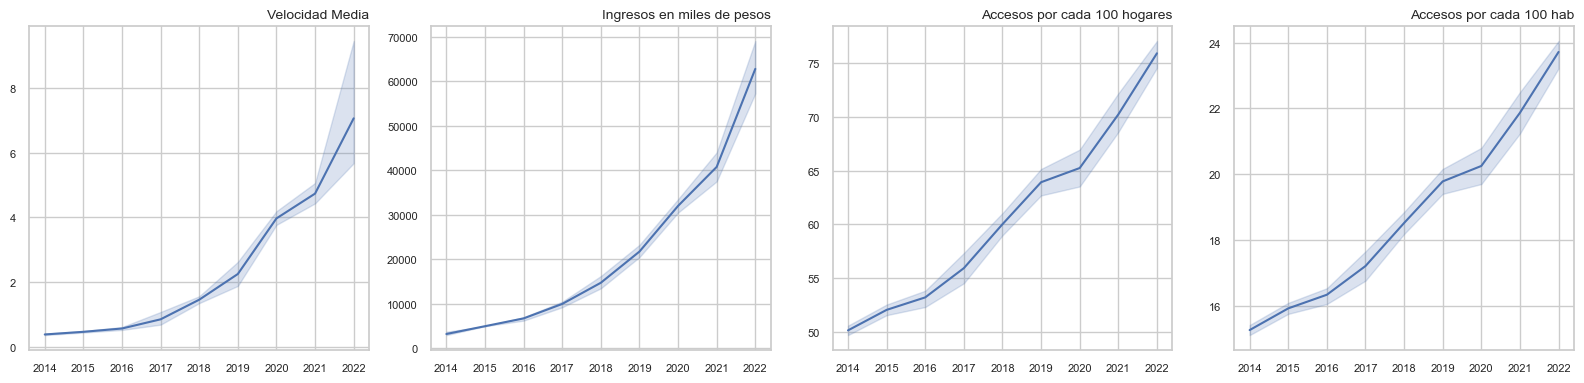

In [3]:
# Configuración de los gráficos de líneas
fig, axs = plt.subplots(1, 4, figsize=(16, 4))  # Crear una fila de 4 subgráficos

# Gráfico 1: velocidad_por_año
sns.set(style="whitegrid")
sns.lineplot(x='Año', y='Velocidad media', data=velocidad_por_año, ax=axs[0])
axs[0].set_title("Velocidad Media", fontsize=10, loc="right")
axs[0].set_xlabel("")
axs[0].set_ylabel("")
axs[0].tick_params(axis='both', labelsize=8)

# Gráfico 2: ingresos_nac
sns.set(style="whitegrid")
sns.lineplot(x='Año', y='Ingresos', data=ingresos_nac, ax=axs[1])
axs[1].set_title("Ingresos en miles de pesos", fontsize=10, loc="right")
axs[1].set_xlabel("")
axs[1].set_ylabel("")
axs[1].tick_params(axis='both', labelsize=8)

# Gráfico 3: penetracion_nac (Accesos por cada 100 hogares)
sns.set(style="whitegrid")
sns.lineplot(x='Año', y='Accesos por cada 100 hogares', data=penetracion_nac, ax=axs[2])
axs[2].set_title("Accesos por cada 100 hogares", fontsize=10, loc="right")
axs[2].set_xlabel("")
axs[2].set_ylabel("")
axs[2].tick_params(axis='both', labelsize=8)

# Gráfico 4: penetracion_nac (Accesos por cada 100 hab)
sns.set(style="whitegrid")
sns.lineplot(x='Año', y='Accesos por cada 100 hab', data=penetracion_nac, ax=axs[3])
axs[3].set_title("Accesos por cada 100 hab", fontsize=10, loc="right")
axs[3].set_xlabel("")
axs[3].set_ylabel("")
axs[3].tick_params(axis='both', labelsize=8)

plt.tight_layout()
plt.show()

Podemos observar que todas las metricas generales apuntan no solo a un crecimiento, si no a una aceleracion del crecimiento en los ultimos años, además, los indicadores de penetración por cada 100 habitantes y hogares, muestran un margen sobre el que crecer, lo que indica la presencia de un mercado aún no saturado con oportunidades.

Es importante entender que los sercicios de conexión a internet se componen de dos tipos principales de tecnología, una antigua, Dial up, y una moderna, banda ancha, este último se subdivide a su vez en multiples tipos, ADSL, Cablemodem, Fibra óptica, Wireless, 3G, 4G, etc.

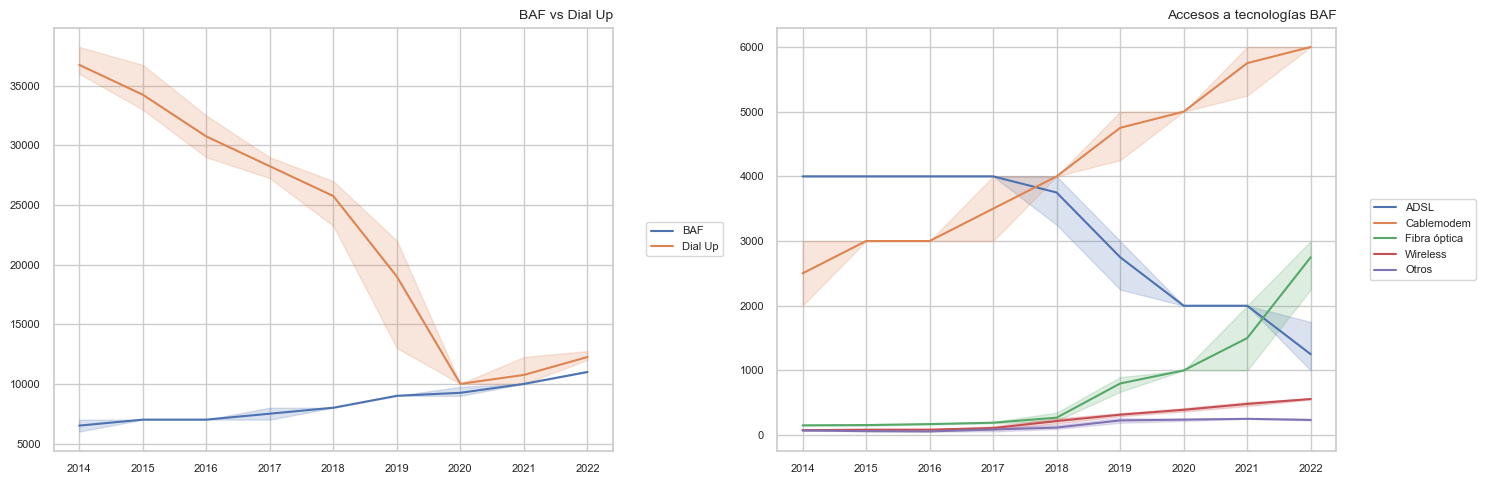

In [4]:
# Tecnologías
fig, axs = plt.subplots(1, 2, figsize=(15, 5))  # Crear una fila de 2 subgráficos

# Gráfico 1: BAF vs Dial Up
sns.set(style="whitegrid")
sns.lineplot(x='Año', y='BAF', data=accesos_nac_por_tecnologia, label='BAF', ax=axs[0])
sns.lineplot(x='Año', y='Dial Up', data=accesos_nac_por_tecnologia, label='Dial Up', ax=axs[0])
axs[0].set_title("BAF vs Dial Up", fontsize=10, loc="right")
axs[0].set_xlabel("")
axs[0].set_ylabel("")
axs[0].tick_params(axis='both', labelsize=8)
axs[0].legend(bbox_to_anchor=(1.05, 0.5), loc='center left', prop={'size': 8})

# Gráfico 2: Accesos a tecnologías BAF
sns.set(style="whitegrid")
sns.lineplot(x='Año', y='ADSL', data=accesos_nac_por_tecnologia, label='ADSL', ax=axs[1])
sns.lineplot(x='Año', y='Cablemodem', data=accesos_nac_por_tecnologia, label='Cablemodem', ax=axs[1])
sns.lineplot(x='Año', y='Fibra óptica', data=accesos_nac_por_tecnologia, label='Fibra óptica', ax=axs[1])
sns.lineplot(x='Año', y='Wireless', data=accesos_nac_por_tecnologia, label='Wireless', ax=axs[1])
sns.lineplot(x='Año', y='Otros', data=accesos_nac_por_tecnologia, label='Otros', ax=axs[1])
axs[1].set_title("Accesos a tecnologías BAF", fontsize=10, loc="right")
axs[1].set_xlabel("")
axs[1].set_ylabel("")
axs[1].tick_params(axis='both', labelsize=8)
axs[1].legend(bbox_to_anchor=(1.05, 0.5), loc='center left', prop={'size': 8})

plt.tight_layout()
plt.show()

Los datos muestran claramente una disminucion paulatina en el uso de la tecnología Dial Up, acompañado de un aumento en las tecnologías banda ancha. En lo que respecta a las tecnologías banda ancha, ADSL la tecnología mas lenta y antigua de todas es la única que se encuentra en decline, todas las demás en crecimiento, especialmente la fibra óptica, la mas nueva y moderna de las tecnologías.

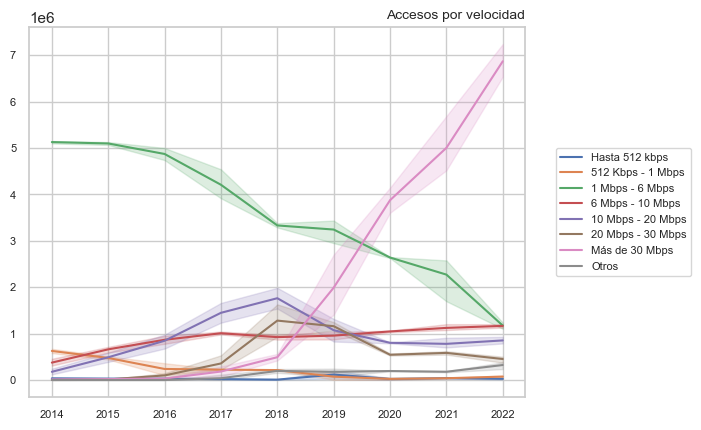

In [5]:
# Velocidades
sns.set(style="whitegrid")
sns.lineplot(x='Año', y='Hasta 512 kbps', data=accesos_nac_por_velocidad, label='Hasta 512 kbps')
sns.lineplot(x='Año', y='Entre 512 Kbps y 1 Mbps', data=accesos_nac_por_velocidad, label='512 Kbps - 1 Mbps')
sns.lineplot(x='Año', y='Entre 1 Mbps y 6 Mbps', data=accesos_nac_por_velocidad, label='1 Mbps - 6 Mbps')
sns.lineplot(x='Año', y='Entre 6 Mbps y 10 Mbps', data=accesos_nac_por_velocidad, label='6 Mbps - 10 Mbps')
sns.lineplot(x='Año', y='Entre 10 Mbps y 20 Mbps', data=accesos_nac_por_velocidad, label='10 Mbps - 20 Mbps')
sns.lineplot(x='Año', y='Entre 20 Mbps y 30 Mbps', data=accesos_nac_por_velocidad, label='20 Mbps - 30 Mbps')
sns.lineplot(x='Año', y='Más de 30 Mbps', data=accesos_nac_por_velocidad, label='Más de 30 Mbps')
sns.lineplot(x='Año', y='Otros', data=accesos_nac_por_velocidad, label='Otros')
plt.title("Accesos por velocidad", fontsize=10, loc="right")
plt.xlabel("")
plt.ylabel("")
plt.tick_params(axis='both', labelsize=8)
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', prop={'size': 8})
plt.show()

En cuanto a las velocidades de las conexioens, todos los servicios de menos de 30 MBps estan en decrecimiento, mientras que los de mas de 30 MBps están en claro aumento.

#### Tecnologias

Debido a la complejidad geopolítica de Argentina, la cual posee un territorio extenso con una distribucion y densidad poblacional muy variadas y que los servicios de internet se encuentran enormemente influenciados por las infraestructuras, politicas y poblaciones de cada provincia, es necesario evaluar el desempezo de tecnologías y velocidades para cada zona para entender como se desarrollan las tendencias observadas en cada zona.

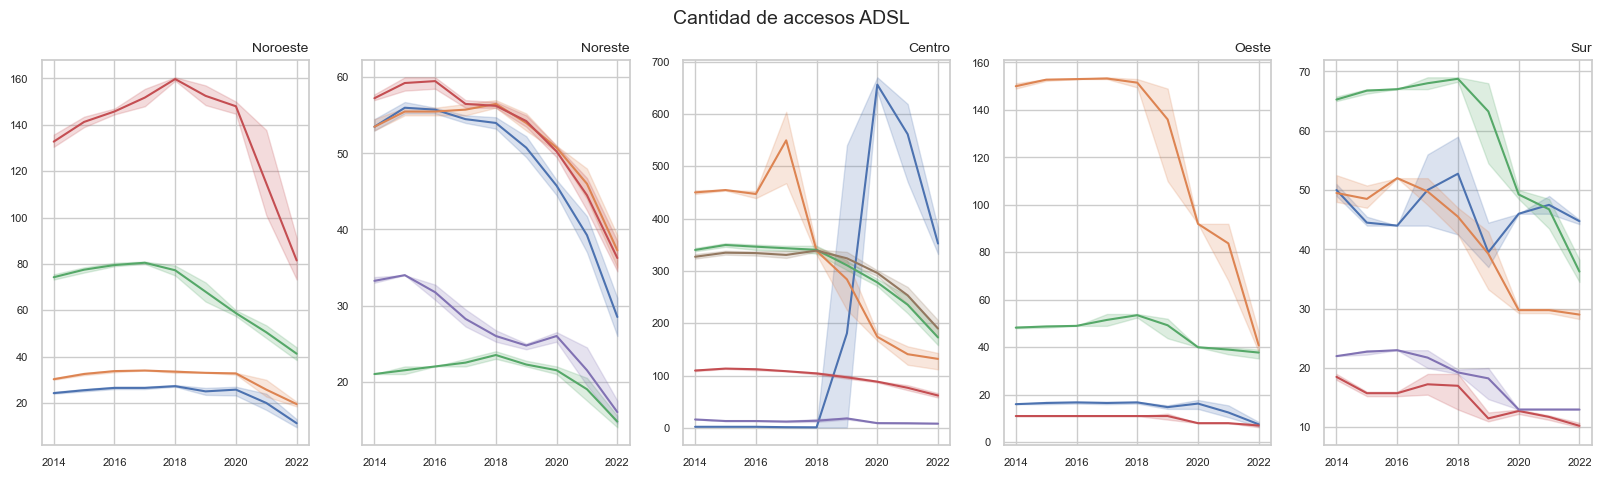

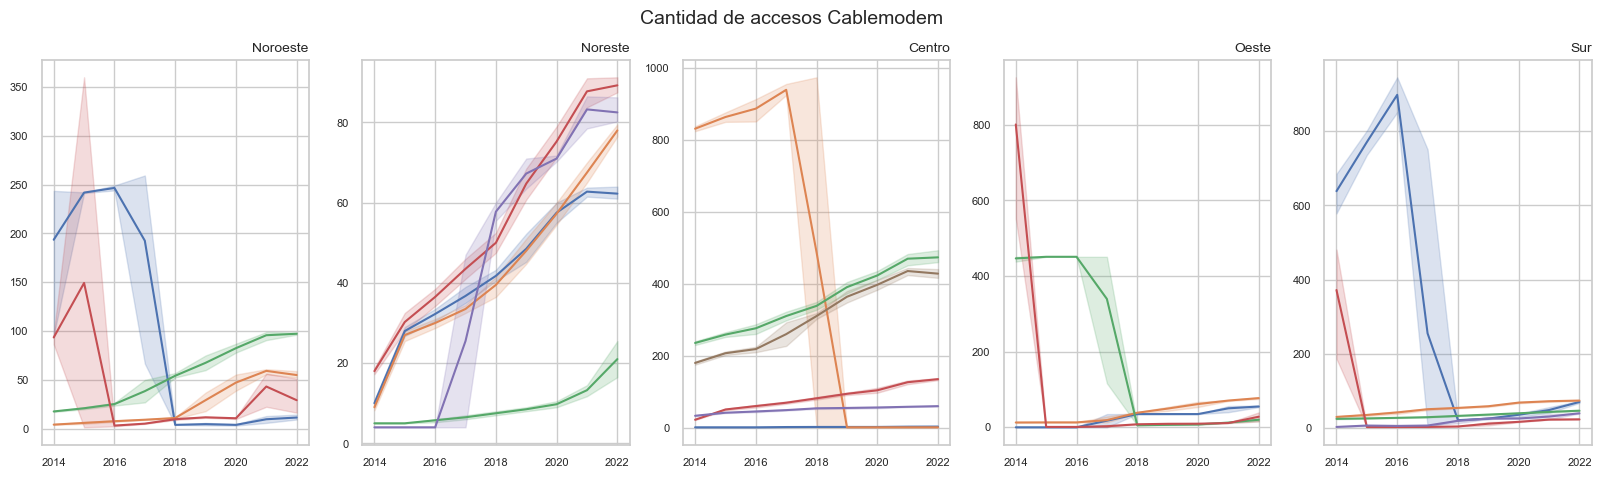

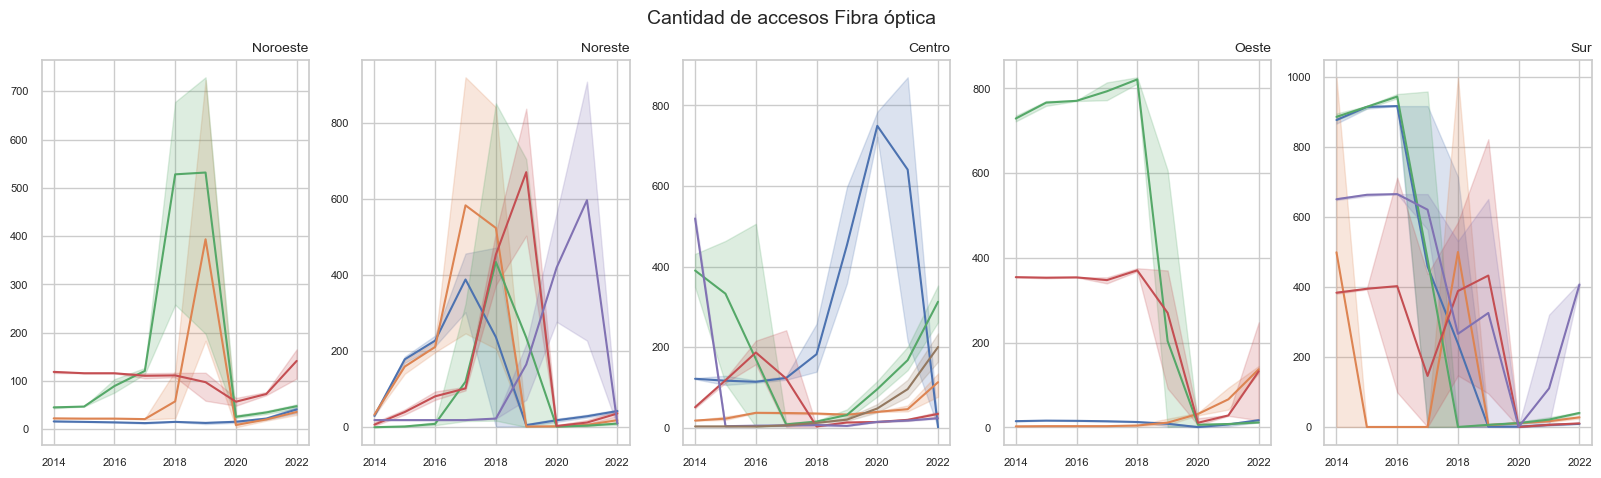

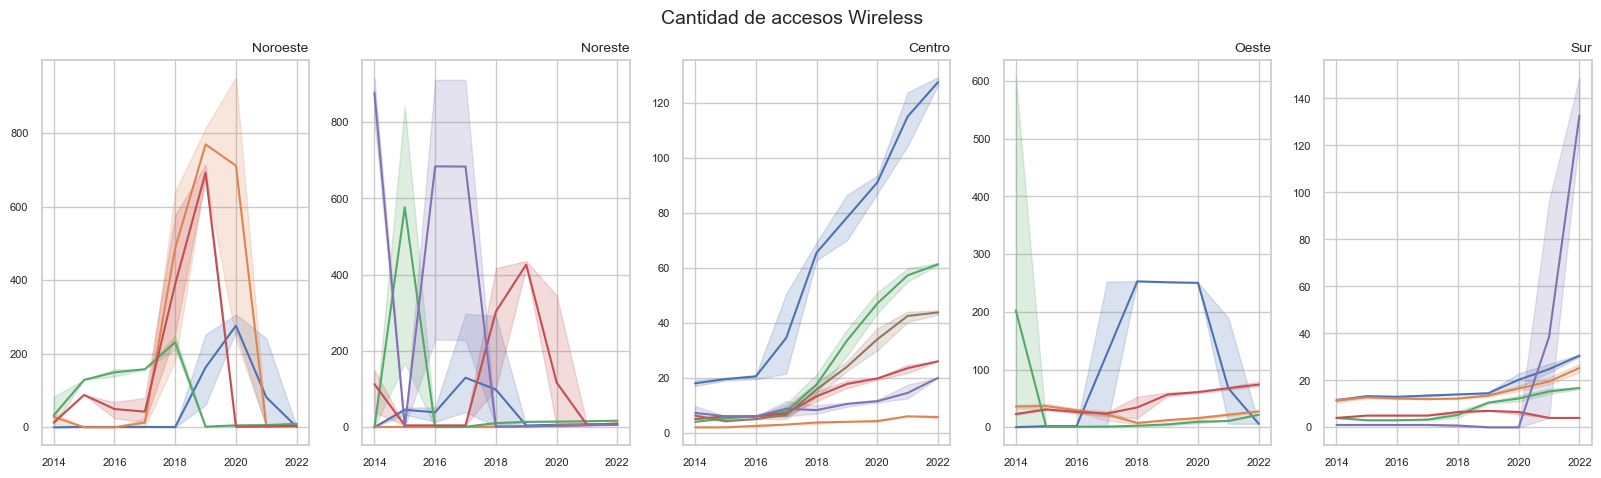

In [6]:
# Intento fallido de normalización de datos
# accesos_prov_por_tecnologia["ADSL"] = accesos_prov_por_tecnologia["ADSL"].apply(lambda x: x * 1000 if x < 30 else x)
# accesos_prov_por_tecnologia["Cablemodem"] = accesos_prov_por_tecnologia["Cablemodem"].apply(lambda x: x * 1000 if x < 30 else x)
# accesos_prov_por_tecnologia["Fibra óptica"] = accesos_prov_por_tecnologia["Fibra óptica"].apply(lambda x: x * 1000 if x < 10 else x)
# accesos_prov_por_tecnologia["Total"] = accesos_prov_por_tecnologia["Total"].apply(lambda x: x * 1000 if x < 30 else x)

# Aplicar la función para crear la columna 'Zona' en el DataFrame
def asignar_zona(provincia):
    noreste = ["Formosa", "Chaco", "Santiago Del Estero", "Corrientes", "Misiones"]
    noroeste = ["Jujuy", "Salta", "Tucumán", "Catamarca"]
    centro = ["Capital Federal", "Buenos Aires", "Santa Fe", "Córdoba", "Entre Ríos", "La Pampa"]
    oeste = ["San Juan", "Mendoza", "San Luis", "La Rioja"]
    sur = ["Neuquén", "Río Negro", "Chubut", "Santa Cruz", "Tierra Del Fuego"]
    if provincia in noroeste:
        return 'Noroeste'
    elif provincia in noreste:
        return 'Noreste'
    elif provincia in centro:
        return 'Centro'
    elif provincia in oeste:
        return 'Oeste'
    elif provincia in sur:
        return 'Sur'
    else:
        return None
accesos_prov_por_tecnologia['Zona'] = accesos_prov_por_tecnologia['Provincia'].apply(asignar_zona)

technologias = ["ADSL", "Cablemodem", "Fibra óptica", "Wireless"]
for technologia in technologias:
    fig, axes = plt.subplots(1, 5, figsize=(20, 5)) 
    zonas = ["Noroeste", "Noreste", "Centro", "Oeste", "Sur"]
    for i, zona in enumerate(zonas):
        data_provincia = accesos_prov_por_tecnologia[accesos_prov_por_tecnologia["Zona"] == zona]
        sns.lineplot(data=data_provincia, x="Año", y=technologia, hue="Provincia", ax=axes[i])
        axes[i].set_title(f"{zona}", fontsize=10, loc="right")
        axes[i].set_xlabel("")
        axes[i].set_ylabel("")
        axes[i].get_legend().remove()
        axes[i].tick_params(axis='both', labelsize=8)
    fig.suptitle(f"Cantidad de accesos {technologia}", fontsize=14)

A pesar de las distorsiones, se puede concluir que las tendencias observadas a nivel nacional se replican con ciertas varianzas, las tencnologías ASDL estan desapareciendo, Cablemodem encuentra su crecimiento estancado, y las tecnologías wireless y fibra óptica en aumento. Observandose un aumento mucho mas acelerado en las provincias de la zona central, algo mas moderado en el noroeste, oeste y sur, y bastnte lento en en noreste.

#### Penetración

Text(0.5, 0.98, 'Cantidad de accesos por cada 100 hogares')

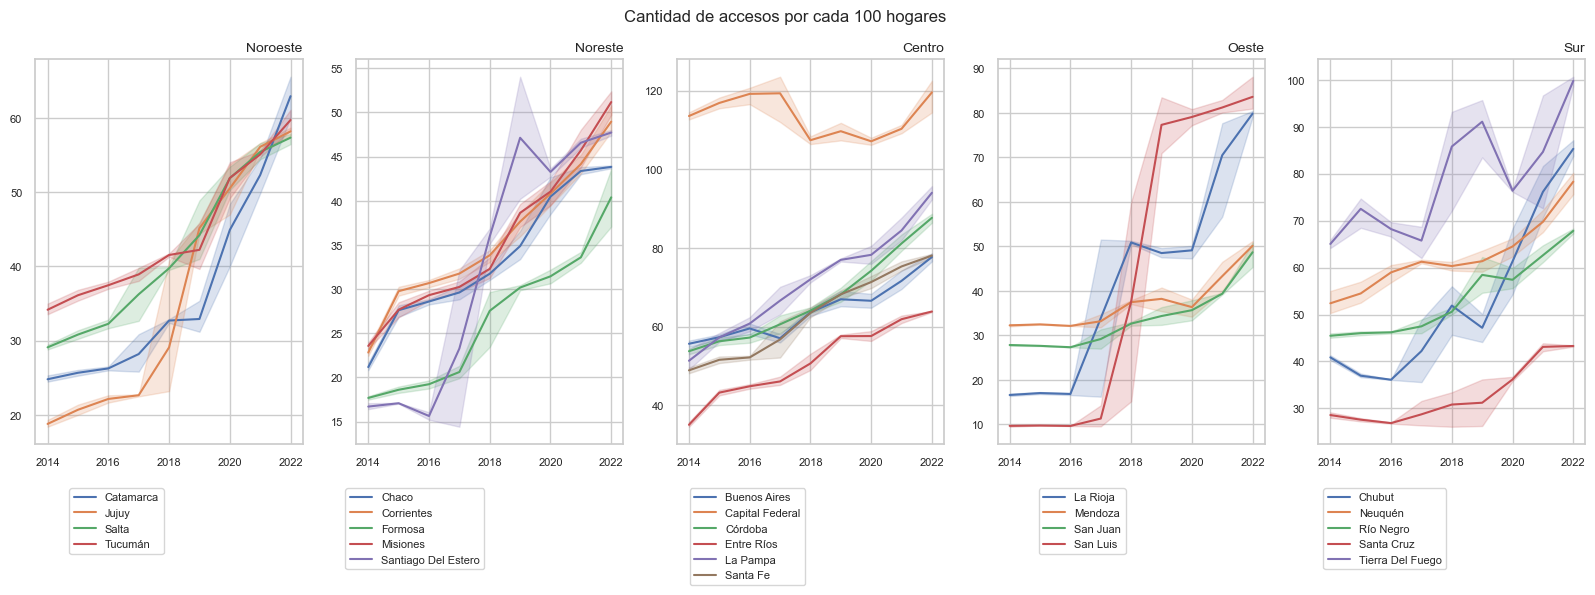

In [7]:
# Aplicar la función para crear la columna 'Zona' en el DataFrame
def asignar_zona(provincia):
    noreste = ["Formosa", "Chaco", "Santiago Del Estero", "Corrientes", "Misiones"]
    noroeste = ["Jujuy", "Salta", "Tucumán", "Catamarca"]
    centro = ["Capital Federal", "Buenos Aires", "Santa Fe", "Córdoba", "Entre Ríos", "La Pampa"]
    oeste = ["San Juan", "Mendoza", "San Luis", "La Rioja"]
    sur = ["Neuquén", "Río Negro", "Chubut", "Santa Cruz", "Tierra Del Fuego"]
    if provincia in noroeste:
        return 'Noroeste'
    elif provincia in noreste:
        return 'Noreste'
    elif provincia in centro:
        return 'Centro'
    elif provincia in oeste:
        return 'Oeste'
    elif provincia in sur:
        return 'Sur'
    else:
        return None
penetracion_prov['Zona'] = penetracion_prov['Provincia'].apply(asignar_zona)

fig, axes = plt.subplots(1, 5, figsize=(20, 5)) 
zonas = ["Noroeste", "Noreste", "Centro", "Oeste", "Sur"]
for i, zona in enumerate(zonas):
    data_provincia = penetracion_prov[penetracion_prov["Zona"] == zona]
    sns.lineplot(data=data_provincia, x="Año", y="Accesos por cada 100 hogares", hue="Provincia", ax=axes[i])
    axes[i].set_title(f"{zona}", fontsize=10, loc="right")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].get_legend().remove()
    axes[i].tick_params(axis='both', labelsize=8)
    axes[i].legend(loc='upper right', bbox_to_anchor=(0.5, -0.1), prop={'size': 8})
fig.suptitle(f"Cantidad de accesos por cada 100 hogares", fontsize=12)

Puede observarse que la cantidad de accesos viene en aumento para todas las provincias exceptuando capital federal, mercado ya saturado. Pueden encontrarse tambien aquellas provincias donde los accesos se encuentran por debado de los 50 hogares por cada 100 hogares, principalmente en el noreste, y el oeste.

#### Conectividad

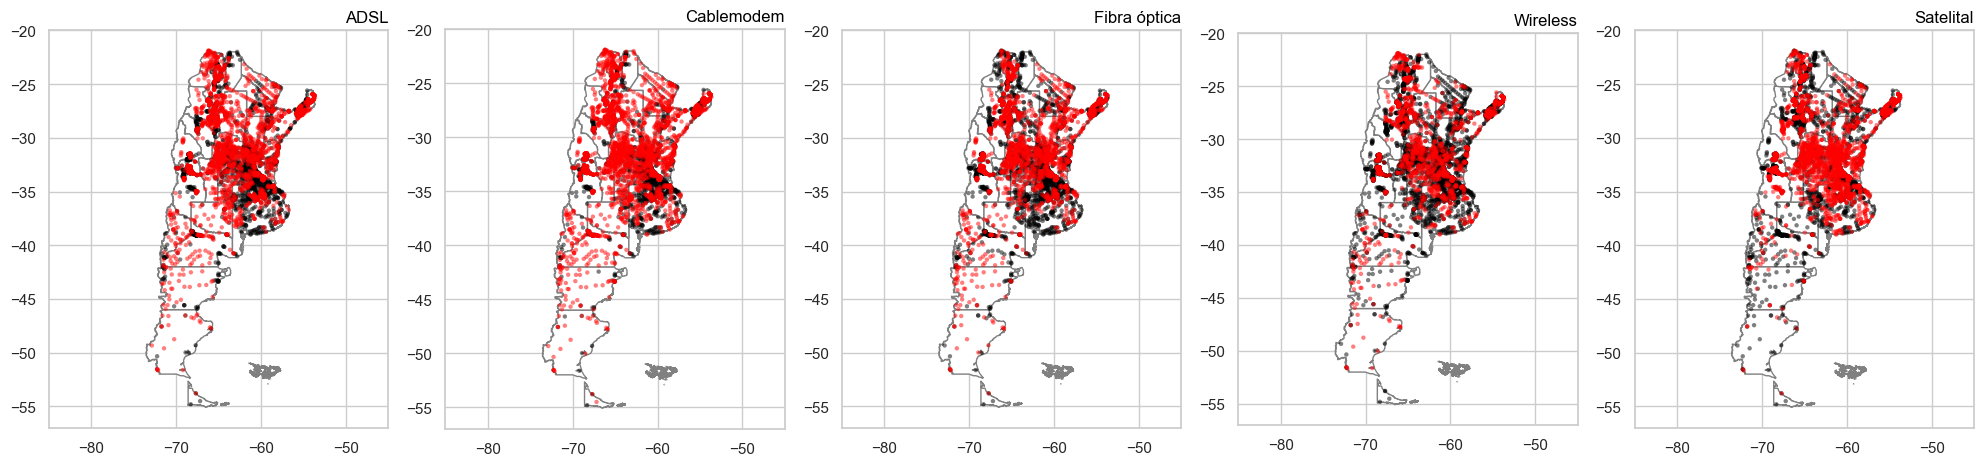

In [8]:
# conectividad por localidades
tecnologias = ["ADSL", "Cablemodem", "Fibra óptica", "Wireless", "Satelital"]
fig, axs = plt.subplots(1, 5, figsize=(20, 10))
for i, ax in enumerate(axs):
    sig_provincias.plot(legend=False, ax=ax, edgecolor='grey', linewidth=1, color='white')
    loc_data = sig_localidades.merge(localidades_con_conectividad[["Localidad", tecnologias[i]]])
    loc_data[loc_data[tecnologias[i]] == True].plot(ax=ax, color="black", edgecolor="none", alpha=0.5, markersize=10)
    loc_data[loc_data[tecnologias[i]] == False].plot(ax=ax, color="red", edgecolor="none", alpha=0.5, markersize=10)
    ax.set_xlim([-85, -45])
    ax.set_ylim([-57, -20])
    ax.set_facecolor('white')
    ax.set_title(f"{tecnologias[i]}", fontsize=12, color="black", loc='right')
plt.tight_layout()
plt.show()

Al analizar las localidades con su tipo de servicio puede confirmarse lo anteriormente mencionado. La distribucion de los potenciales mercados (puntos rojos), se encuentra principalmente en las provincias de la zona centro y noreste, con algunas excepciones como la provincia de misiones.

#### Conclusion

Multiples estrategias pueden desprenderse del analisis dependiendo de la zona del país objetivo:
 
 - Zona centro: es la zona donde mas conexiones hay establecidas, pero tambien la que mayor infraestructura dispone, esto disminuye el costo de la inversion pero implica un mercado mas competitivo, mi recomendacion es centrarse en aquellas personas transicionando de tecnologias mas viejas como ADSL y cablemodem a mas nuevas como fibra óptica. Además, estas son las provincias con mayor desarrollo industrial y de servicios, lo que posibilita una penetración por encima del 100 por ciento por cada 100 hogares.

- Zona noroeste: es una zona donde la fibra óptica se ha empezado a implementar pero aún se encuentra en torno a los 60 hogares por cada 100, comparado con las provincias de la zona centro, que alcanzan valores de hasta 80 hogares, podemos deducir que aún quedan muchas conexiones por establecer, sin embargo debe tenerse en cuenta que es una zona mucho menos industrializada, por lo que el techo de penetracion es algo más bajo.

- Zona noreste y oeste: las conexiones disponibles en esta zona son mucho mas elevadas, todas las provincias se encuentran en torno a los 50 accesos por cada 100 hogares, pero la infraestructura es mucho mas escasa, y el desarrollo económico es mucho más limitado, por lo que limitaría la búsqueda de nuevos clientes a grandes ciudades, continuando con la instauración del cablemodem.

- Zona sur: estas provincias son particulares debido a la baja densidad poblacional y los altos costos en infraestructura debido a las grandes distancias. Aún asi, la cantidad de accesos por cada 100 hogares es bastante elevada, el acceso a traves de internet satelital es más común en esta zona en las localidades más recluidas, mientras que la fibra óptica se esta utilizando en las grandes ciudades.